In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


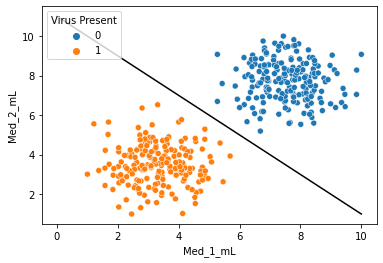

In [15]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

x= np.linspace(0,10,5)
m=-1
b = 11
y=m*x+b
plt.plot(x,y,'k')

In [16]:
from sklearn.svm import SVC

In [18]:
X = df.drop('Virus Present',axis=1)
Y = df['Virus Present']

In [19]:
model = SVC(kernel='linear',C=1000)

In [20]:
model.fit(X,Y)

SVC(C=1000, kernel='linear')

In [21]:
from svm_margin_plot import plot_svm_boundary

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


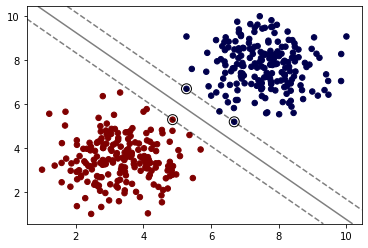

In [22]:
plot_svm_boundary(model,X,Y)

In [23]:
model = SVC(kernel='linear',C=0.05)

In [24]:
model.fit(X,Y)

SVC(C=0.05, kernel='linear')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


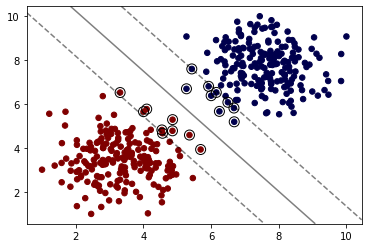

In [25]:
plot_svm_boundary(model,X,Y)

In [26]:
model = SVC(kernel='rbf',C=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


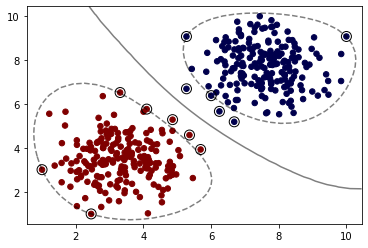

In [27]:
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


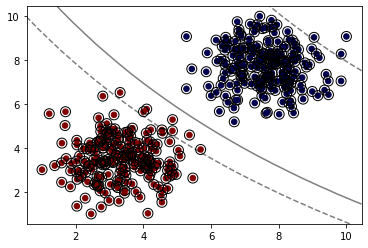

In [28]:
model = SVC(kernel='sigmoid')
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = SVC()
params = {'C':[0.01,0.1,0.5,1,1.5,5,10],'kernel':['linear','rbf']}
grid = GridSearchCV(model,params)

In [31]:
grid.fit(X,Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 1.5, 5, 10],
                         'kernel': ['linear', 'rbf']})

In [32]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [33]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [34]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [36]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

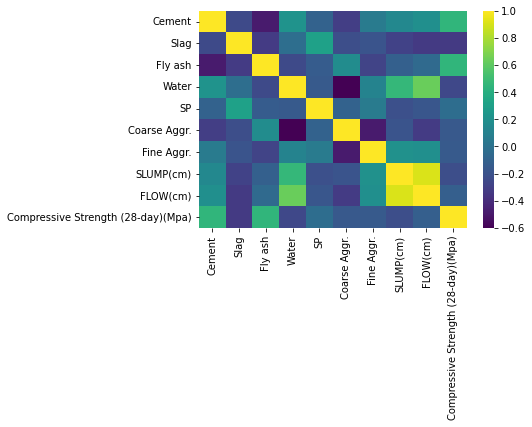

In [38]:
sns.heatmap(data=df.corr(),cmap='viridis')

In [40]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [41]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [42]:
Y = df['Compressive Strength (28-day)(Mpa)']

In [43]:
from sklearn.model_selection import train_test_split

In [57]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=.3,random_state=101)

In [45]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [47]:
from sklearn.svm import SVR, LinearSVR

In [48]:
model = SVR()

In [59]:
model.fit(Xtrain,Ytrain)

SVR()

In [60]:
preds = model.predict(Xtest)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
mae = mean_absolute_error(Ytest,preds)

In [62]:
mse = mean_squared_error(Ytest,preds)

In [63]:
mae

5.236902091259178

In [64]:
Ytest.mean()

36.26870967741935

In [65]:
np.sqrt(mse)

6.695914838327133

In [66]:
params = {'C':[0.01,0.1,0.5,1,10],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
svr = SVR()
grid = GridSearchCV(svr,params)

In [69]:
grid.fit(Xtrain,Ytrain)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
grid.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [71]:
preds2 = grid.predict(Xtest)

In [72]:
mean_absolute_error(Ytest,preds2)

2.36428237754956

In [73]:
np.sqrt(mean_squared_error(Ytest,preds2))

3.4874320146243547

In [74]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [75]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [78]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:>

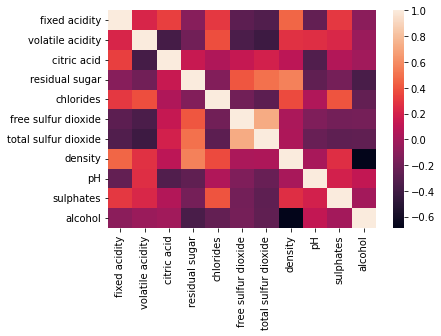

In [79]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='type', ylabel='count'>

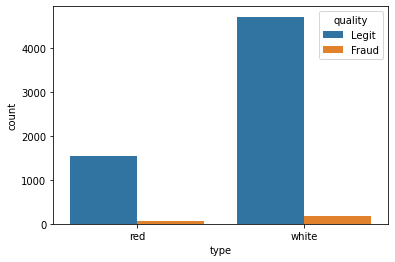

In [81]:
sns.countplot(data=df,x='type',hue='quality')

In [86]:
df[df['type'=='white]]

SyntaxError: EOL while scanning string literal (1524305329.py, line 1)

In [93]:
ll = len(df[df['type']=='white'])

In [92]:
ff = len(df[(df['type']=='white') & (df['quality']=='Fraud')])

In [94]:
(ff/ll)*100

3.7362188648427925

In [99]:
llred = len(df[df['type']=='red'])

In [98]:
ffred = len(df[(df['type']=='red') & (df['quality']=='Fraud')])

In [100]:
ffred/llred

0.039399624765478425

In [101]:
df['fraud'] = df['quality'].map({'Fraud':1,'Legit':0})

In [103]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [105]:
cor = df.corr()['fraud']

<AxesSubplot:>

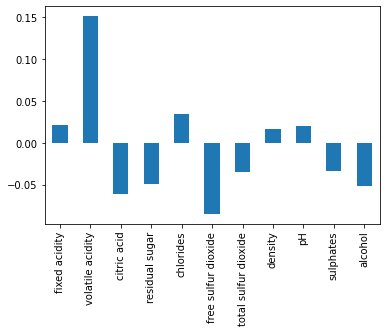

In [109]:
cor[:-1].plot(kind='bar')

In [110]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [111]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


In [112]:
X = df.drop(['fraud','quality'],axis=1)

In [113]:
Y = df['fraud']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=.1,random_state=101)

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [119]:
from sklearn.svm import SVC

In [121]:
svc = SVC(class_weight='balanced')

In [122]:
params = {'C':[0,0.1,0.5,1,5,10],'gamma':['scale','auto']}

In [123]:
grid = GridSearchCV(svc,params)

In [124]:
grid.fit(Xtrain,Ytrain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework/V

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0, 0.1, 0.5, 1, 5, 10],
                         'gamma': ['scale', 'auto']})

In [125]:
grid.best_params_

{'C': 10, 'gamma': 'scale'}

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [127]:
preds = grid.predict(Xtest)

In [128]:
confusion_matrix(Ytest,preds)

array([[557,  66],
       [ 15,  12]])

In [129]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       623
           1       0.15      0.44      0.23        27

    accuracy                           0.88       650
   macro avg       0.56      0.67      0.58       650
weighted avg       0.94      0.88      0.90       650

